In [26]:
# import libraries
import pandas as pd

In [27]:
#load data
delays_df = pd.read_csv("Data/Lots_of_flight_data.csv")
delays_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903.0,-2.0,1450,1433.0,-17.0,225,210.0,197.0,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458.0,-2.0,2045,2020.0,-25.0,225,202.0,191.0,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802.0,2.0,2045,2032.0,-13.0,105,90.0,80.0,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947.0,-3.0,1235,1223.0,-12.0,105,96.0,81.0,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151.0,1.0,1430,1423.0,-7.0,100,92.0,80.0,580


In [28]:
#explore data
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              300000 non-null  object 
 1   OP_UNIQUE_CARRIER    300000 non-null  object 
 2   TAIL_NUM             299660 non-null  object 
 3   OP_CARRIER_FL_NUM    300000 non-null  int64  
 4   ORIGIN               300000 non-null  object 
 5   DEST                 300000 non-null  object 
 6   CRS_DEP_TIME         300000 non-null  int64  
 7   DEP_TIME             296825 non-null  float64
 8   DEP_DELAY            296825 non-null  float64
 9   CRS_ARR_TIME         300000 non-null  int64  
 10  ARR_TIME             296574 non-null  float64
 11  ARR_DELAY            295832 non-null  float64
 12  CRS_ELAPSED_TIME     300000 non-null  int64  
 13  ACTUAL_ELAPSED_TIME  295832 non-null  float64
 14  AIR_TIME             295832 non-null  float64
 15  DISTANCE         

In [29]:
#clean data
delays_df.dropna(inplace=True)

In [30]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295832 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              295832 non-null  object 
 1   OP_UNIQUE_CARRIER    295832 non-null  object 
 2   TAIL_NUM             295832 non-null  object 
 3   OP_CARRIER_FL_NUM    295832 non-null  int64  
 4   ORIGIN               295832 non-null  object 
 5   DEST                 295832 non-null  object 
 6   CRS_DEP_TIME         295832 non-null  int64  
 7   DEP_TIME             295832 non-null  float64
 8   DEP_DELAY            295832 non-null  float64
 9   CRS_ARR_TIME         295832 non-null  int64  
 10  ARR_TIME             295832 non-null  float64
 11  ARR_DELAY            295832 non-null  float64
 12  CRS_ELAPSED_TIME     295832 non-null  int64  
 13  ACTUAL_ELAPSED_TIME  295832 non-null  float64
 14  AIR_TIME             295832 non-null  float64
 15  DISTANCE         

In [31]:
#Set up Features and Labels Data set
X = delays_df.loc[:, ["DEP_DELAY"]]
y = delays_df.loc[:, ["ARR_DELAY"]]

In [32]:
# Split Train and Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                                            X,
                                                                            y,
                                                                            test_size = 0.3,
                                                                            random_state = 42
                                                                            )

In [33]:
# Train the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
# Make Predict
y_predict = regressor.predict(X_test)

In [35]:
# Evaluate and Measure Prediction Accurancy
# R2 Score
from sklearn.metrics import r2_score

score = r2_score(y_test, y_predict)
print(" R-squared (R2) value :  ", score )

 R-squared (R2) value :   0.9151586086984399


# Visualization

In [36]:
# visualization
import matplotlib.pyplot as plt
%matplotlib inline

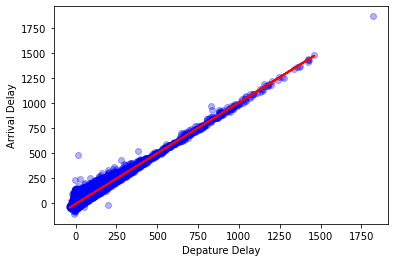

In [39]:
plt.xlabel("Depature Delay")
plt.ylabel("Arrival Delay")

#linear regression line
plt.plot(
            X_test,
            y_predict,
            color = "red",
            linewidth = 2
            )

# original data
plt.scatter(
                x = delays_df["DEP_DELAY"],
                y = delays_df["ARR_DELAY"],
                color = "blue",
                alpha = 0.3
                )

plt.show()

----------------

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

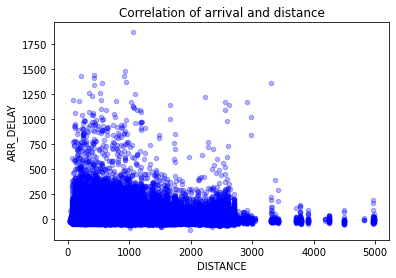

In [24]:
# check relationship between distance of flight and how late flight arrives
delays_df.plot(
                        kind = "scatter",
                        x = "DISTANCE",
                        y = "ARR_DELAY",
                        color = "blue",
                        alpha = 0.3,
                        title = "Correlation of arrival and distance")

plt.show()

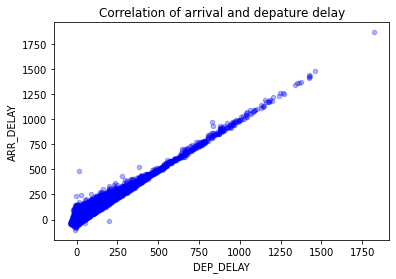

In [25]:
# check relationship between how late flight leaves and how late flight arrives
delays_df.plot(
                    kind = "scatter",
                    x = "DEP_DELAY",
                    y = "ARR_DELAY",
                    color = "blue",
                    alpha = 0.3,
                    title = "Correlation of arrival and depature delay")

plt.show()

The scatter plot allows us to see there is no correlation between distance and arrival delay but there is a strong correlation between departure delay and arrival delay.